In [1]:
import pandas as pd
data=pd.read_csv('/kaggle/input/coviddata/covid_dataset.csv')
data

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
0,69,37.371591,No,Yes,Yes,542,Yes
1,32,38.012143,No,Yes,No,1624,No
2,89,36.688738,Yes,No,No,1603,No
3,78,37.670494,Yes,Yes,Yes,1113,Yes
4,38,37.512786,Yes,No,No,1787,No
...,...,...,...,...,...,...,...
995,27,37.580782,Yes,Yes,Yes,1952,No
996,51,37.200816,No,Yes,Yes,1974,No
997,72,38.320523,Yes,No,No,703,No
998,49,37.624599,No,No,Yes,1341,No


In [2]:
data.head()

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
0,69,37.371591,No,Yes,Yes,542,Yes
1,32,38.012143,No,Yes,No,1624,No
2,89,36.688738,Yes,No,No,1603,No
3,78,37.670494,Yes,Yes,Yes,1113,Yes
4,38,37.512786,Yes,No,No,1787,No


In [3]:
data.tail()

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
995,27,37.580782,Yes,Yes,Yes,1952,No
996,51,37.200816,No,Yes,Yes,1974,No
997,72,38.320523,Yes,No,No,703,No
998,49,37.624599,No,No,Yes,1341,No
999,67,37.710737,No,No,No,1462,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1000 non-null   int64  
 1   Temperature             1000 non-null   float64
 2   Cough                   1000 non-null   object 
 3   Sore Throat             1000 non-null   object 
 4   Fatigue                 1000 non-null   object 
 5   Daily Vitamin D Intake  1000 non-null   int64  
 6   COVID-19 Positive       1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


Missing Values:
 Age                       0
Temperature               0
Cough                     0
Sore Throat               0
Fatigue                   0
Daily Vitamin D Intake    0
COVID-19 Positive         0
dtype: int64
Statistical Measures:
                Age  Temperature  Daily Vitamin D Intake
count  1000.000000  1000.000000             1000.000000
mean     52.881000    37.531243             1200.279000
std      20.958915     0.510427              459.931364
min      18.000000    35.824195              403.000000
25%      34.750000    37.191691              814.000000
50%      52.500000    37.526769             1199.000000
75%      71.000000    37.880216             1612.250000
max      89.000000    39.083686             1999.000000


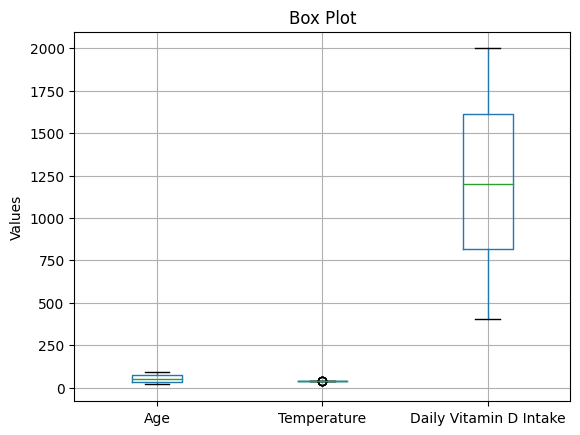

In [5]:
import matplotlib.pyplot as plt

 

 

# Check for missing values

missing_values = data.isnull().sum()

print("Missing Values:\n", missing_values)

 

# Calculate statistical measures

statistics = data.describe()

print("Statistical Measures:\n", statistics)

 

# Create a box plot for outlier detection

data.boxplot(column=['Age', 'Temperature', 'Daily Vitamin D Intake'])

plt.title('Box Plot')

plt.ylabel('Values')

plt.show()

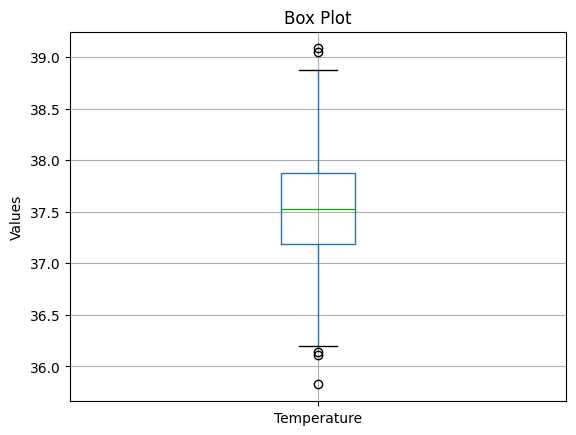

In [6]:
data.boxplot(column=['Temperature'])

plt.title('Box Plot')

plt.ylabel('Values')

plt.show()

In [7]:
# Define the encoding dictionary

encoding_dict = {

    'Cough': {'No': 0, 'Yes': 1},

    'Sore Throat': {'No': 0, 'Yes': 1},

    'Fatigue': {'No': 0, 'Yes': 1},

    'COVID-19 Positive': {'No': 0, 'Yes': 1}

}

 

# Apply encoding to the DataFrame

data.replace(encoding_dict, inplace=True)

 

# Display the updated DataFrame

print(data.head())

   Age  Temperature  Cough  Sore Throat  Fatigue  Daily Vitamin D Intake  \
0   69    37.371591      0            1        1                     542   
1   32    38.012143      0            1        0                    1624   
2   89    36.688738      1            0        0                    1603   
3   78    37.670494      1            1        1                    1113   
4   38    37.512786      1            0        0                    1787   

   COVID-19 Positive  
0                  1  
1                  0  
2                  0  
3                  1  
4                  0  


In [8]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score

 

 

# Split the data into features (X) and target (y)

X = data.drop('COVID-19 Positive', axis=1)

y = data['COVID-19 Positive']

 

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create a logistic regression model

model = LogisticRegression()

 

# Fit the model on the training data

model.fit(X_train, y_train)

 

# Make predictions on the test set

y_pred = model.predict(X_test)

 

# Calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.915


In [10]:
score=model.score(X_test,y_test)
score

0.915

In [11]:
recall = recall_score(y_test, y_pred)

print("Recall",recall)

Recall 0.7941176470588235


In [12]:
precision  = precision_score(y_test,y_pred)

print(precision)

0.7297297297297297


In [14]:
from sklearn.metrics import confusion_matrix

#suppose that we have three classes A,B, and C

y_true = ['A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','C','C','C','C','C','C','C','C','C']

# Predicted values

y_pred = ['A','A','A','A','B','C','A','A','A','A','A','A','C','C','B','B','A','A','A','C','C','C','C','C','C']

In [15]:
# Print the confusion matrix

print(confusion_matrix(y_true, y_pred))





[[4 1 1]
 [6 2 2]
 [3 0 6]]


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [17]:
class_labels = ['A','B','C']

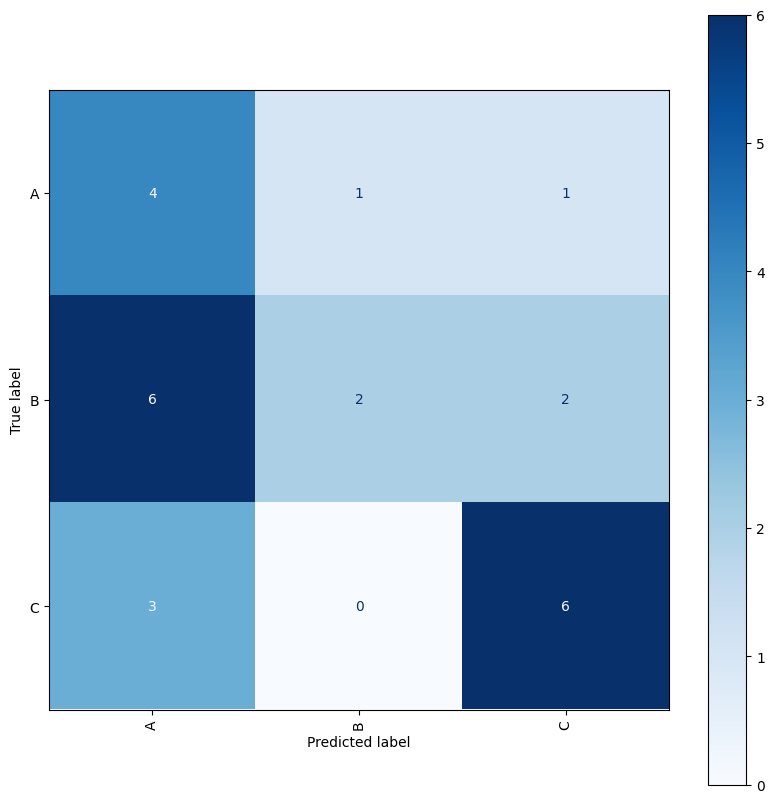

In [18]:
disp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,

                          cmap=plt.cm.Blues,

                  display_labels=class_labels, xticks_rotation="vertical",

                  values_format='',

)

fig = disp.ax_.get_figure()

fig.set_figwidth(10)

fig.set_figheight(10)